In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# Identifying Credit Card Default with Machine Learning

## Loading the data and managing data types

1. Import the libraries:

In [3]:
import pandas as pd

2. Load the data from the CSV file:

In [4]:
# Download Csv file from previous lecture

df = pd.read_csv('credit_card_default.csv', index_col=0, na_values='')
print(f'The DataFrame has {len(df)} rows and {df.shape[1]} columns.')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'credit_card_default.csv'

3. Separate the features from the target:

In [ ]:
X = df.copy()
y = X.pop('default_payment_next_month')

### There's more

In [5]:
df.dtypes

NameError: name 'df' is not defined

In [6]:
def get_df_memory_usage(df, top_columns=5):
    '''
    Function for quick analysis of a pandas DataFrames memory usage.
    It prints the top `top_columns` columns in terms of memory usage 
    and the total usage of the DataFrame.
    
    Parameters
    ------------
    df : pd.DataFrame
    DataFrame to be inspected
    top_columns : int
    Number of top columns (in terms of memory used) to display
    '''''
    print('Memory usage ----')
    memory_per_column = df.memory_usage(deep=True) / 1024 ** 2
    print(f'Top {top_columns} columns by memory (MB):')
    print(memory_per_column.sort_values(ascending=False) \
                           .head(top_columns))
    print(f'Total size: {memory_per_column.sum():.4f} MB')

In [7]:
get_df_memory_usage(df, 5)

NameError: name 'df' is not defined

In [8]:
df_cat = df.copy()
object_columns = df_cat.select_dtypes(include='object').columns
df_cat[object_columns] = df_cat[object_columns].astype('category')

NameError: name 'df' is not defined

In [ ]:
get_df_memory_usage(df_cat)

In [9]:
column_dtypes = {'education': 'category', 
                'marriage': 'category', 
                'sex': 'category',
                'payment_status_sep': 'category', 
                'payment_status_aug': 'category', 
                'payment_status_jul': 'category',       
                'payment_status_jun': 'category', 
                'payment_status_may': 'category', 
                'payment_status_apr': 'category'}
df_cat2 = pd.read_csv('credit_card_default.csv', index_col=0, 
                      na_values='', dtype=column_dtypes)

FileNotFoundError: [Errno 2] No such file or directory: 'credit_card_default.csv'

In [ ]:
get_df_memory_usage(df_cat2)

In [ ]:
df_cat.equals(df_cat2)

## Exploratory Data Analysis

1. Import the libraries:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.io as pio

2. Get summary statistics for numeric variables:

In [10]:
df.describe().transpose().round(2)

NameError: name 'df' is not defined

3. Get summary statistics for categorical variables:

In [11]:
df.describe(include='object').transpose()

NameError: name 'df' is not defined

4. Plot the distribution of age and split it by gender:

NameError: name 'sns' is not defined

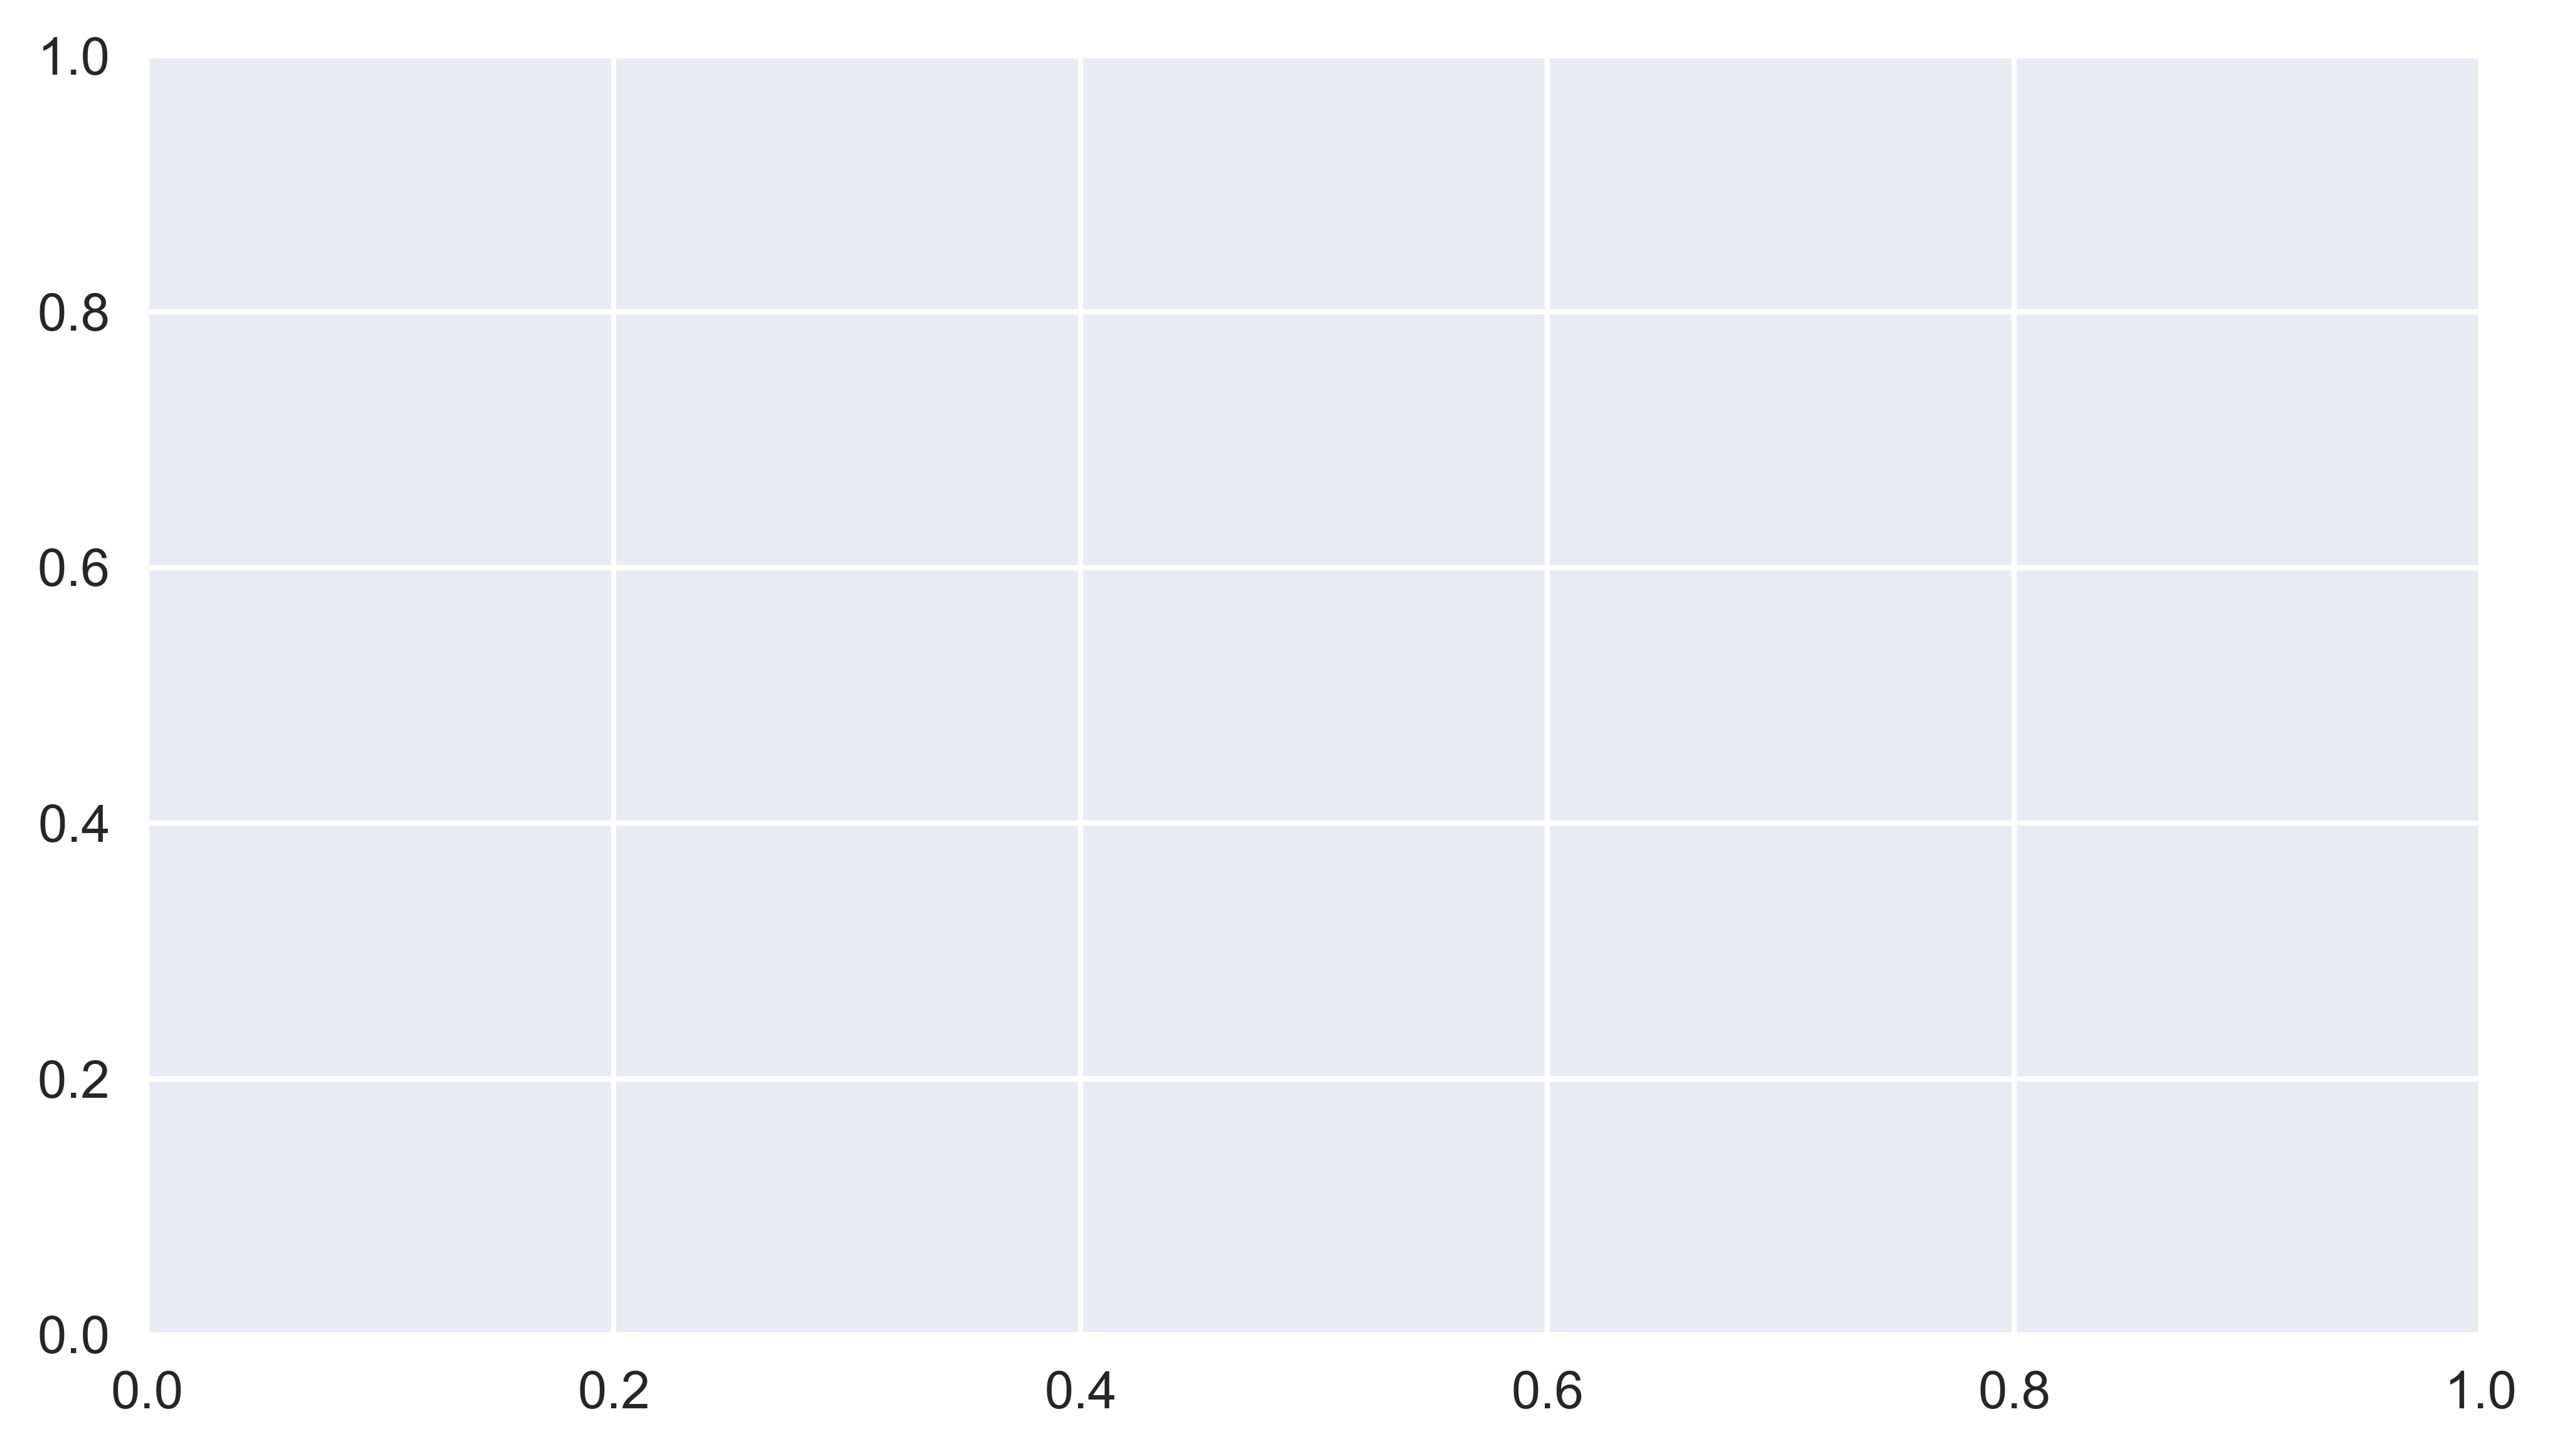

In [12]:
fig, ax = plt.subplots()
sns.distplot(df.loc[df.sex=='Male', 'age'].dropna(), 
            hist=False, color='green', 
            kde_kws={'shade': True},
            ax=ax, label='Male')
sns.distplot(df.loc[df.sex=='Female', 'age'].dropna(), 
            hist=False, color='blue', 
            kde_kws={'shade': True},
            ax=ax, label='Female')
ax.set_title('Distribution of age')
ax.legend(title='Gender:')

plt.tight_layout()
plt.show()

As mentioned in the text, we can create a histogram (together with the KDE), by calling:

In [13]:
ax = sns.distplot(df.age.dropna(), )
ax.set_title('Distribution of age');

NameError: name 'sns' is not defined

We noticed some spikes appearing every ~10 years and the reason for this is the binning. Below, we created the same histogram using `sns.countplot` and `plotly_express`. By doing so, each value of age has a separate bin and we can inspect the plot in detail. There are no such spikes in the following plots:

In [ ]:
plot_ = sns.countplot(x=df.age.dropna(), color='blue')

for ind, label in enumerate(plot_.get_xticklabels()):
    if int(float(label.get_text())) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

In [ ]:
px.histogram(df, x='age', title = 'Distribution of age')

5. Plot a `pairplot` of selected variables:

In [14]:
pair_plot = sns.pairplot(df[['age', 'limit_bal', 'previous_payment_sep']])
pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05)

plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

Additionally, we can separate the genders by specifying the `hue` argument:

In [ ]:
# pair_plot = sns.pairplot(df[['sex', 'age', 'limit_bal', 'previous_payment_sep']], 
#                          hue='sex')
# pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05);

6. Define and run a function for plotting the correlation heatmap:

In [ ]:
def plot_correlation_matrix(corr_mat):
    '''
    Function for plotting the correlation heatmap. It masks the irrelevant fields.
    
    Parameters
    ----------
    corr_mat : pd.DataFrame
    Correlation matrix of the features.
    '''''
    
    # temporarily change style
    sns.set(style='white')
    # mask the upper triangle
    mask = np.zeros_like(corr_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # set up the matplotlib figure
    fig, ax = plt.subplots()
    # set up custom diverging colormap
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    # plot the heatmap
    sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
               square=True, linewidths=.5, 
               cbar_kws={'shrink': .5}, ax=ax)
    ax.set_title('Correlation Matrix', fontsize=16)
    # change back to darkgrid style
    sns.set(style='darkgrid')

In [ ]:
corr_mat = df.select_dtypes(include='number').corr()    
plot_correlation_matrix(corr_mat)

plt.tight_layout()
plt.show()

We can also directly inspect the correlation between the features (numerical) and the target:

In [ ]:
df.select_dtypes(include='number').corr()[['default_payment_next_month']]

7. Plot the distribution of limit balance for each gender and education level:

In [ ]:
ax = sns.violinplot(x='education', y='limit_bal', 
                   hue='sex', split=True, data=df)
ax.set_title('Distribution of limit balance per education level', 
            fontsize=16)

plt.tight_layout()
plt.show()

The following code plots the same information, without splitting the violin plots.

In [15]:
# ax = sns.violinplot(x='education', y='limit_bal', 
#                     hue='sex', data=df)
# ax.set_title('Distribution of limit balance per education level', 
#              fontsize=16);

8. Investigate the distribution of the target variable per gender and education level:

In [16]:
ax = sns.countplot('default_payment_next_month', hue='sex', 
                  data=df, orient='h')
ax.set_title('Distribution of the target variable', fontsize=16)

plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

9. Investigate the percentage of defaults per education level:

In [17]:
ax = df.groupby('education')['default_payment_next_month'] \
       .value_counts(normalize=True) \
       .unstack() \
       .plot(kind='barh', stacked='True')
ax.set_title('Percentage of default per education level', 
            fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1,1)) 

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

## Splitting the data into training and test sets

1. Import the function from `sklearn`:

In [ ]:
pip show scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

2. Split the data into training and test sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42)

3. Split the data into training and test sets without shuffling:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   shuffle=False)

4. Split the data into training and test sets with stratification:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   stratify=y, 
                                                   random_state=42)

5. Verify that the ratio of the target is preserved:

In [ ]:
y_train.value_counts(normalize=True)

In [18]:
y_test.value_counts(normalize=True)

NameError: name 'y_test' is not defined

## Dealing with missing values

1. Import the libraries:

In [19]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd 
import missingno
from sklearn.impute import SimpleImputer

2. Inspect the information about the DataFrame:

In [21]:
X.info()

NameError: name 'X' is not defined

3. Visualize the nullity of the DataFrame:

In [22]:
missingno.matrix(X)

plt.show()

NameError: name 'X' is not defined

4. Define columns with missing values per data type:

In [ ]:
NUM_FEATURES = ['age']
CAT_FEATURES = ['sex', 'education', 'marriage']

5. Impute the numerical feature:

In [ ]:
for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

In [ ]:
# alternative method using pandas

# for feature in NUM_FEATURES:
#     median_value = X_train[feature].median()
#     X_train.loc[:, feature].fillna(median_value, inplace=True)
#     X_test.loc[:, feature].fillna(median_value, inplace=True)

6. Impute the categorical features:

In [ ]:
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

In [ ]:
# alternative method using pandas

# for feature in CAT_FEATURES:
#     mode_value = X_train[feature].mode().values[0]
#     X_train.loc[:, feature].fillna(mode_value, inplace=True)
#     X_test.loc[:, feature].fillna(mode_value, inplace=True)

7. Verify that there are no missing values:

In [23]:
X_train.info()

NameError: name 'X_train' is not defined

## Encoding categorical variables

1. Import the libraries:

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

2. Use Label Encoder to encode a selected column:

In [25]:
COL = 'education'

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

NameError: name 'X_train' is not defined

3. Select categorical features for one-hot encoding:

In [ ]:
CAT_FEATURES = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()

4. Instantiate the One-Hot Encoder object:

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False, 
                               handle_unknown='error', 
                               drop='first')

5. Create the column transformer using the one-hot encoder: 

In [ ]:
one_hot_transformer = ColumnTransformer(
    [("one_hot", one_hot_encoder, CAT_FEATURES)]
    #,remainder='passthrough'
)

6. Fit the transformer:

In [ ]:
one_hot_transformer.fit(X_train)

7. Apply the transformations to both training and test sets:

In [26]:
col_names = one_hot_transformer.get_feature_names()

X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train),
                          columns=col_names, 
                          index=X_train.index)
X_train_ohe = pd.concat([X_train, X_train_cat], axis=1) \
                .drop(CAT_FEATURES, axis=1)

X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test), 
                         columns=col_names, 
                         index=X_test.index)
X_test_ohe = pd.concat([X_test, X_test_cat], axis=1) \
               .drop(CAT_FEATURES, axis=1)

NameError: name 'one_hot_transformer' is not defined

## Fitting a decision tree classifier

1. Import the libraries:

In [ ]:
pip install pydotplus

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

from chapter_8_utils import performance_evaluation_report

from io import StringIO
import seaborn as sns
from ipywidgets import Image
import pydotplus

2. Create the instance of the model, fit it to the training data and create prediction:

In [27]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_ohe, y_train)
y_pred = tree_classifier.predict(X_test_ohe)

NameError: name 'DecisionTreeClassifier' is not defined

3. Evaluate the results:

In [28]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_classifier, 
                                         X_test_ohe, 
                                         y_test, labels=LABELS, 
                                         show_plot=True)

plt.tight_layout()
plt.show()

NameError: name 'performance_evaluation_report' is not defined

In [ ]:
tree_perf

4. Plot the simplified Decision Tree:

In [ ]:
small_tree = DecisionTreeClassifier(max_depth=3, 
                                    random_state=42)
small_tree.fit(X_train_ohe, y_train)

tree_dot = StringIO()
export_graphviz(small_tree, feature_names=X_train_ohe.columns,
                class_names=LABELS, rounded=True, out_file=tree_dot,
                proportion=False, precision=2, filled=True)
tree_graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())  
tree_graph.set_dpi(300) 
Image(value=tree_graph.create_png())

## Implementing scikit-learn's pipelines

1. Import the libraries:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from chapter_8_utils import performance_evaluation_report

2. Load the data, separate the target and create the stratified train-test split:

In [ ]:
df = pd.read_csv('credit_card_default.csv', index_col=0, 
                                 na_values='')

X = df.copy()
y = X.pop('default_payment_next_month')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   stratify=y, 
                                                   random_state=42)

3. Store lists of numerical/categorical features:

In [ ]:
num_features = X_train.select_dtypes(include='number') \
                      .columns \
                      .to_list()
cat_features = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()

4. Define the numerical pipeline:

In [ ]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

5. Define the categorical pipeline:

In [ ]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(categories=cat_list, sparse=False, 
                            handle_unknown='error', drop='first'))
])

6. Define the column transformer object:

In [29]:
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_features),
    ('categorical', cat_pipeline, cat_features)],
    remainder='drop')


NameError: name 'num_pipeline' is not defined

7. Create the joint pipeline:

In [ ]:
dec_tree = DecisionTreeClassifier(random_state=42)

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', dec_tree)])

8. Fit the pipeline to the data:

In [ ]:
tree_pipeline.fit(X_train, y_train)

9. Evaluate the performance of the entire pipeline:

In [ ]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_pipeline, X_test, 
                                         y_test, labels=LABELS, 
                                         show_plot=True)

plt.tight_layout()
plt.show()

In [30]:
tree_perf

NameError: name 'tree_perf' is not defined

## Tuning hyperparameters using grid search and cross-validation

1. Import the libraries:

In [ ]:
from sklearn.model_selection import (GridSearchCV, cross_val_score, 
                                    RandomizedSearchCV, cross_validate, 
                                    StratifiedKFold)
from sklearn import metrics

2. Define the cross-validation scheme:

In [ ]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

3. Evaluate the pipeline using cross-validation:

In [ ]:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)

4. Add extra metrics to cross-validation:

In [ ]:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold, 
              scoring=['accuracy', 'precision', 'recall', 
                      'roc_auc'])

5. Define the parameter grid:

In [ ]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
             'classifier__max_depth': range(3, 11),
             'classifier__min_samples_leaf': range(2, 11)}

6. Run Grid Search:

In [31]:
classifier_gs = GridSearchCV(tree_pipeline, param_grid, scoring='recall', 
                            cv=k_fold, n_jobs=-1, verbose=1)

classifier_gs.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

7. Evaluate the performance of the Grid Search:

In [ ]:
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                            y_test, labels=LABELS, 
                                            show_plot=True)

plt.tight_layout()
plt.show()

In [32]:
tree_gs_perf

NameError: name 'tree_gs_perf' is not defined

8. Run Randomized Grid Search:

In [ ]:
classifier_rs = RandomizedSearchCV(tree_pipeline, param_grid, scoring='recall', 
                                  cv=k_fold, n_jobs=-1, verbose=1, 
                                  n_iter=100, random_state=42)
classifier_rs.fit(X_train, y_train)

In [ ]:
print(f'Best parameters: {classifier_rs.best_params_}') 
print(f'Recall (Training set): {classifier_rs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_rs.predict(X_test)):.4f}')

9. Evaluate the performance of the Randomized Grid Search:

In [ ]:
tree_rs_perf = performance_evaluation_report(classifier_rs, X_test, 
                                            y_test, labels=LABELS, 
                                            show_plot=True)

plt.tight_layout()
plt.show()

In [ ]:
tree_rs_perf